In [1]:
# Setup for collab, commment out otherwise
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Change directory to the package folder
%cd '/content/drive/MyDrive/ElusiveImages'
# Verify the contents of the current folder
#!ls
# Install the requirements with pip
!pip install -r collab_requirements.txt

Mounted at /content/drive
/content/drive/MyDrive/ElusiveImages


In [2]:
import numpy as np
import torch

torch.cuda.empty_cache()
import torchvision.models as tvmodels
import torchvision.transforms as transforms
import yaml
from PIL import Image
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from database import BaseDatabase
from models import SiameseNet
from dataset import TripletData
from dataset import ContrastiveData
from dataset import QuadrupletData
from loss import TripletLoss
from loss import ContrastiveLoss
from loss import QuadrupletLoss
from MLPMixer.models.modeling import MlpMixer, CONFIGS
from torch import nn
import logging as log
from utils.MAP import compute_map
import matplotlib.pyplot as plt
from train import *

Setting seed value to 123456 for reproducing results
[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.14394483554639803, 0.057344863253066376, 0.16464355414550727, 0.06705661959568208, 0.09596631124951438, 0.24732503824300697, 0.12250760849393662, 0.16279084413850037, 0.04691982821865635, 0.09518083912615162, 0.05243414354742479, 0.07331783884518259, 0.0591504198926074, 0.06674426918567544, 0.10322140424679487, 0.0581664700317044, 0.12424515046585356]
[INFO] CATEGORY MATCHES: 82/272: 0.3015
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 61.90160369873047, Validation Loss = 59.88897705078125
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 60.316341400146484, Validation Loss = 61.8427734375
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 60.164344787597656, Validation Loss = 64.42692565917969
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 58.70612335205078, Validation Loss = 59.14808654785156
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 59.06578826904297, Validation Loss = 60.55805206298828
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 59.09699630737305, Validation Loss = 61.07631301879883
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 59.93043899536133, Validation Loss = 61.30531692504883
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 58.750030517578125, Validation Loss = 59.39033508300781
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 59.260318756103516, Validation Loss = 58.5228271484375
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 59.093971252441406, Validation Loss = 59.66122817993164
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 58.86878967285156, Validation Loss = 59.04972457885742
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 58.3469123840332, Validation Loss = 58.00648498535156
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 58.3670539855957, Validation Loss = 58.21065902709961
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 58.37211608886719, Validation Loss = 59.22385025024414
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 58.48460006713867, Validation Loss = 58.66338348388672
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 58.28748321533203, Validation Loss = 58.41946792602539
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 58.111202239990234, Validation Loss = 57.80674362182617
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 58.167396545410156, Validation Loss = 58.01601028442383
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 58.31854248046875, Validation Loss = 60.10091018676758
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 58.05794906616211, Validation Loss = 58.26678466796875
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 58.191410064697266, Validation Loss = 57.28523254394531
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 58.13418960571289, Validation Loss = 58.24973678588867
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 58.129215240478516, Validation Loss = 59.11492919921875
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 58.39274215698242, Validation Loss = 58.76131057739258
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 57.98222351074219, Validation Loss = 58.23698806762695
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.17966551135496447, 0.14850219225219224, 0.18988114207840773, 0.10721098562895437, 0.1443412707084582, 0.21047310978951603, 0.23705303485576926, 0.23315473588911087, 0.027654187175671547, 0.18356356100496726, 0.12228278448981572, 0.06914164394633145, 0.16000764101350037, 0.07625704373751248, 0.10010902725746475, 0.11323618330454266, 0.12324506006146631]
[INFO] CATEGORY MATCHES: 117/272: 0.4301
[INFO] Accuracy change: pre-training 0.3015 --> post-training 0.4301
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


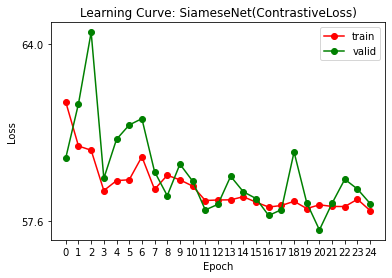

In [3]:
# Seed value to reproduce results
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 1000,
              'model': 'SiameseNet', 'category': 'resnet18', 'pretrain': False,
              'data': 'dataset/flowers', 'img_h': 384, 'img_w': 384, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'ContrastiveLoss', 'loss_margin': 15.0,
              'dataset': 'ContrastiveData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results
[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.13591237863698802, 0.06875594024031524, 0.16195802353028915, 0.07564783848963536, 0.0991379876633783, 0.26564704826423574, 0.12057740978639415, 0.1597607091259435, 0.056653708704489956, 0.09153414944430568, 0.06239525990502553, 0.0842303096209346, 0.05717781567390942, 0.06689863413496226, 0.10807042350011098, 0.05078569434038184, 0.13501120190573315]
[INFO] CATEGORY MATCHES: 96/272: 0.3529
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 2.7283432483673096, Validation Loss = 1.4215666055679321
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 1.0483709573745728, Validation Loss = 1.199032187461853
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 0.8881344199180603, Validation Loss = 1.148047924041748
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 0.8358650207519531, Validation Loss = 0.9649185538291931
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 0.6341866254806519, Validation Loss = 0.8478832244873047
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 0.6487730145454407, Validation Loss = 1.0238398313522339
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 0.5436213612556458, Validation Loss = 0.6250606179237366
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 0.49876669049263, Validation Loss = 0.8033023476600647
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 0.45553770661354065, Validation Loss = 0.6786574125289917
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 0.4312240481376648, Validation Loss = 0.8445470333099365
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 0.457003116607666, Validation Loss = 0.5538313984870911
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 0.4053877294063568, Validation Loss = 0.8221193552017212
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 0.3801932632923126, Validation Loss = 0.5043423175811768
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 0.2960778474807739, Validation Loss = 0.4942834675312042
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 0.3394671380519867, Validation Loss = 0.49869292974472046
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 0.26803186535835266, Validation Loss = 0.5704164505004883
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 0.28502538800239563, Validation Loss = 0.5993524193763733
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 0.2399667650461197, Validation Loss = 0.726201057434082
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 0.257644921541214, Validation Loss = 0.6157641410827637
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 0.29424813389778137, Validation Loss = 0.5606215000152588
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 0.2969631552696228, Validation Loss = 0.34673771262168884
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 0.20580439269542694, Validation Loss = 0.5609062910079956
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 0.19880089163780212, Validation Loss = 0.4778585433959961
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 0.25265052914619446, Validation Loss = 0.45167723298072815
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 0.20823253691196442, Validation Loss = 0.2994026243686676
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.5671661021270396, 0.38489122097520534, 0.5641842857663171, 0.20662940033057223, 0.6908076678096209, 0.2938136136866606, 0.4684907486177016, 0.5120245206182706, 0.15003747879724444, 0.3795489612384143, 0.26419822581931957, 0.34089808845668224, 0.32237857628482625, 0.2810612185123904, 0.20013779081161892, 0.47823808136308155, 0.618793793012543]
[INFO] CATEGORY MATCHES: 177/272: 0.6507
[INFO] Accuracy change: pre-training 0.3529 --> post-training 0.6507
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


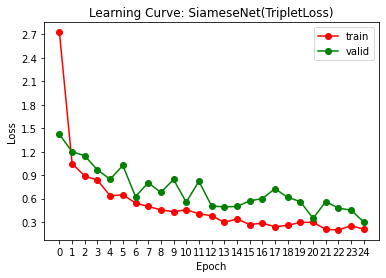

In [4]:
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 1000,
              'model': 'SiameseNet', 'category': 'resnet18', 'pretrain': False,
              'data': 'dataset/flowers', 'img_h': 384, 'img_w': 384, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'TripletLoss', 'dataset': 'TripletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results
[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.14394483554639803, 0.057344863253066376, 0.16464355414550727, 0.06705661959568208, 0.09596631124951438, 0.24732503824300697, 0.12250760849393662, 0.16279084413850037, 0.04691982821865635, 0.09518083912615162, 0.05243414354742479, 0.07331783884518259, 0.0591504198926074, 0.06674426918567544, 0.10322140424679487, 0.0581664700317044, 0.12424515046585356]
[INFO] CATEGORY MATCHES: 82/272: 0.3015
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 5.4048004150390625, Validation Loss = 3.0841190814971924
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 2.574793815612793, Validation Loss = 2.6212029457092285
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 2.0207836627960205, Validation Loss = 2.0706753730773926
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 1.8487979173660278, Validation Loss = 2.509483814239502
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 1.7457771301269531, Validation Loss = 1.808227300643921
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 1.6169037818908691, Validation Loss = 2.3444950580596924
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 1.6961926221847534, Validation Loss = 1.9058377742767334
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 1.293943166732788, Validation Loss = 1.8887903690338135
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 1.3047020435333252, Validation Loss = 1.6155589818954468
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 1.2840261459350586, Validation Loss = 1.5023874044418335
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 1.323933720588684, Validation Loss = 1.5305249691009521
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 1.0932761430740356, Validation Loss = 1.6639103889465332
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 1.0501891374588013, Validation Loss = 1.2984352111816406
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 0.8991881012916565, Validation Loss = 1.3572889566421509
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 1.0227802991867065, Validation Loss = 1.3334983587265015
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 0.9076880216598511, Validation Loss = 1.173287272453308
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 0.9732682704925537, Validation Loss = 1.301714539527893
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 0.8910701870918274, Validation Loss = 1.150997281074524
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 0.9159488677978516, Validation Loss = 1.4293956756591797
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 0.697819709777832, Validation Loss = 1.1975085735321045
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 0.8134912848472595, Validation Loss = 1.1766160726547241
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 0.7698945999145508, Validation Loss = 1.302698016166687
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 0.7619845271110535, Validation Loss = 1.2790744304656982
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 0.7855627536773682, Validation Loss = 1.166277289390564
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 0.720892071723938, Validation Loss = 1.3896634578704834
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.7062752948006854, 0.4689473395528084, 0.588379621680403, 0.17864164914946168, 0.724987301110348, 0.4051361290619103, 0.42553033988580863, 0.7012930645743145, 0.10395478002899877, 0.45387365997717555, 0.4477767837631119, 0.31186545659201914, 0.401683109642094, 0.34770580439525745, 0.29152928234959485, 0.3803950606684982, 0.6242946235622017]
[INFO] CATEGORY MATCHES: 173/272: 0.6360
[INFO] Accuracy change: pre-training 0.3015 --> post-training 0.636
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


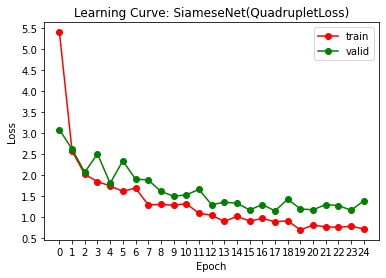

In [5]:
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 1000,
              'model': 'SiameseNet', 'category': 'resnet18', 'pretrain': False,
              'data': 'dataset/flowers', 'img_h': 384, 'img_w': 384, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'QuadrupletLoss', 'dataset': 'QuadrupletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results
[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.3333147267229299, 0.3373746533414503, 0.6989269682140776, 0.21455177851662222, 0.24362000304383113, 0.9753784193237318, 0.4469833280868437, 0.7350871730266262, 0.07794341617583805, 0.42887436456772393, 0.2982829887126762, 0.24833037513701575, 0.46962746996926685, 0.11451789855110164, 0.1697762578133672, 0.4560156098242036, 0.5203045869061493]
[INFO] CATEGORY MATCHES: 186/272: 0.6838
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 6.274921894073486, Validation Loss = 10.195056915283203
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 2.2336325645446777, Validation Loss = 4.228279113769531
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 1.7815734148025513, Validation Loss = 15.895296096801758
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 1.6393153667449951, Validation Loss = 3.8834526538848877
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 1.0775927305221558, Validation Loss = 14.674298286437988
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 1.0880070924758911, Validation Loss = 2.6602783203125
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 0.7976676821708679, Validation Loss = 3.1548404693603516
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 0.6071051359176636, Validation Loss = 3.3886890411376953
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 0.664153516292572, Validation Loss = 2.7109973430633545
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 0.7309775948524475, Validation Loss = 3.9988327026367188
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 0.3637964725494385, Validation Loss = 7.575392723083496
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 0.3452294170856476, Validation Loss = 6.033568859100342
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 0.3412313163280487, Validation Loss = 12.440129280090332
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 0.3692544996738434, Validation Loss = 1.5845519304275513
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 0.11113741248846054, Validation Loss = 1.6445223093032837
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 0.27556201815605164, Validation Loss = 5.400331497192383
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 0.307110995054245, Validation Loss = 7.219344139099121
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 0.34246185421943665, Validation Loss = 4.398229122161865
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 0.33235037326812744, Validation Loss = 10.233503341674805
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 0.3316693603992462, Validation Loss = 16.23390769958496
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 0.202712744474411, Validation Loss = 1.6603624820709229
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 0.2718580961227417, Validation Loss = 1.6388592720031738
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 0.1803993135690689, Validation Loss = 1.494723916053772
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 0.24387416243553162, Validation Loss = 1.4911248683929443
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 0.1414221078157425, Validation Loss = 2.2861053943634033
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.8655687194749695, 0.8507030241893524, 0.821413054176726, 0.6970233867694805, 0.8341604738577395, 0.9385349893162394, 0.8927417688648157, 0.9851249499198718, 0.4855293740547647, 0.8303519885062853, 0.8173768614198302, 0.7389024603868354, 0.8273608986499611, 0.7421569045104202, 0.8286050050210206, 0.8068667606265262, 0.809037907621892]
[INFO] CATEGORY MATCHES: 238/272: 0.8750
[INFO] Accuracy change: pre-training 0.6838 --> post-training 0.875
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


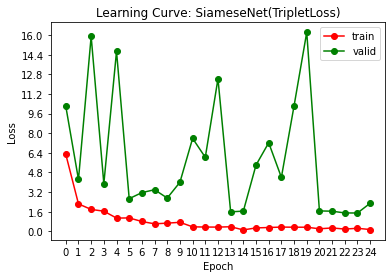

In [9]:
# Seed value to reproduce results
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 256,
              'model': 'SiameseNet', 'category': 'vit_b_16', 'pretrain': True,
              'data': 'dataset/flowers', 'img_h': 224, 'img_w': 224, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'TripletLoss', 'loss_margin': 1.0,
              'dataset': 'TripletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results


Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth


  0%|          | 0.00/109M [00:00<?, ?B/s]

[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.37945132666812353, 0.32527978206689145, 0.8188330116064492, 0.14714447336517653, 0.2872736692560911, 0.9559808680902431, 0.5628243284493284, 0.8926244816381537, 0.1932630141126235, 0.4834203665258353, 0.25080068043935233, 0.29991509141899764, 0.3338370613761239, 0.13619568907654847, 0.3093406485008048, 0.5517236886377511, 0.37005573094440286]
[INFO] CATEGORY MATCHES: 195/272: 0.7169
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 8.107239723205566, Validation Loss = 10.020783424377441
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 3.1477925777435303, Validation Loss = 4.1840691566467285
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 1.8398865461349487, Validation Loss = 5.759509563446045
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 1.952613353729248, Validation Loss = 4.131472110748291
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 0.9506406188011169, Validation Loss = 4.293787479400635
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 1.142301321029663, Validation Loss = 3.92751145362854
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 0.781058132648468, Validation Loss = 1.8461824655532837
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 0.5476388335227966, Validation Loss = 2.8569819927215576
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 0.8833460211753845, Validation Loss = 3.4163358211517334
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 0.7633046507835388, Validation Loss = 3.0930378437042236
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 0.639668881893158, Validation Loss = 1.7474828958511353
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 0.6826809644699097, Validation Loss = 0.9592683911323547
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 0.29435494542121887, Validation Loss = 1.1002742052078247
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 0.24520565569400787, Validation Loss = 1.2129467725753784
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 0.391497403383255, Validation Loss = 2.1456308364868164
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 0.3610280454158783, Validation Loss = 0.7327200770378113
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 0.276423841714859, Validation Loss = 0.6505962014198303
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 0.3567948341369629, Validation Loss = 5.705591201782227
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 0.23792152106761932, Validation Loss = 1.0300216674804688
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 0.39764130115509033, Validation Loss = 3.5348074436187744
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 0.35051771998405457, Validation Loss = 1.8846838474273682
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 0.5071190595626831, Validation Loss = 0.8049351572990417
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 0.2938770353794098, Validation Loss = 4.863487243652344
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 0.21733763813972473, Validation Loss = 5.192424297332764
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 0.1779339611530304, Validation Loss = 2.884002685546875
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.853237561050061, 0.8962410961434399, 1.0, 0.6500987727550228, 0.9126841474497724, 0.946923828125, 0.9144071585966117, 1.0, 0.561839505980131, 0.8335712464618714, 0.9395928507256632, 0.8321121315750222, 0.7722022118506494, 0.835758192545302, 0.7936073258338884, 0.8181001073579197, 0.8581673534798534]
[INFO] CATEGORY MATCHES: 254/272: 0.9338
[INFO] Accuracy change: pre-training 0.7169 --> post-training 0.9338
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


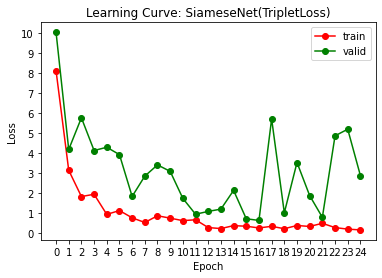

In [10]:
# Seed value to reproduce results
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 256,
              'model': 'SiameseNet', 'category': 'convnext_tiny', 'pretrain': True,
              'data': 'dataset/flowers', 'img_h': 224, 'img_w': 224, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'TripletLoss', 'loss_margin': 1.0,
              'dataset': 'TripletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.3630749133678821, 0.29861478040188977, 0.6145056007360696, 0.4560796462651931, 0.2587943415091853, 0.5473637094242564, 0.3977705725264319, 0.6090272466249028, 0.16041562062069872, 0.3508554325448857, 0.2497751705759518, 0.2893017572705073, 0.2161917184378122, 0.16286986667846043, 0.24214537090513655, 0.5016333492895992, 0.5953023430562493]
[INFO] CATEGORY MATCHES: 183/272: 0.6728
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 0


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 0: Loss = 6.1347246170043945, Validation Loss = 9.077882766723633
[INFO] Training Epoch 1


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 1: Loss = 3.6011292934417725, Validation Loss = 3.705522298812866
[INFO] Training Epoch 2


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 2: Loss = 2.4830753803253174, Validation Loss = 3.909454345703125
[INFO] Training Epoch 3


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 3: Loss = 2.3796334266662598, Validation Loss = 2.163302421569824
[INFO] Training Epoch 4


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 4: Loss = 1.428600788116455, Validation Loss = 3.4016873836517334
[INFO] Training Epoch 5


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 5: Loss = 1.4556381702423096, Validation Loss = 1.2065550088882446
[INFO] Training Epoch 6


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 6


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 6: Loss = 1.043107032775879, Validation Loss = 1.2899473905563354
[INFO] Training Epoch 7


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 7


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 7: Loss = 1.0787986516952515, Validation Loss = 1.1814812421798706
[INFO] Training Epoch 8


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 8


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 8: Loss = 1.0888789892196655, Validation Loss = 1.7461183071136475
[INFO] Training Epoch 9


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 9


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 9: Loss = 0.8998374342918396, Validation Loss = 1.8187470436096191
[INFO] Training Epoch 10


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 10


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 10: Loss = 0.6015461087226868, Validation Loss = 1.3070008754730225
[INFO] Training Epoch 11


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 11


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 11: Loss = 0.7116200923919678, Validation Loss = 0.7988051176071167
[INFO] Training Epoch 12


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 12


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 12: Loss = 0.5441218018531799, Validation Loss = 1.0663182735443115
[INFO] Training Epoch 13


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 13


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 13: Loss = 0.7649025917053223, Validation Loss = 1.6429917812347412
[INFO] Training Epoch 14


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 14


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 14: Loss = 0.5971907377243042, Validation Loss = 1.4396264553070068
[INFO] Training Epoch 15


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 15


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 15: Loss = 0.6196466684341431, Validation Loss = 1.5367919206619263
[INFO] Training Epoch 16


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 16


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 16: Loss = 0.4994467496871948, Validation Loss = 3.304917097091675
[INFO] Training Epoch 17


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 17


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 17: Loss = 0.38447555899620056, Validation Loss = 13.36555004119873
[INFO] Training Epoch 18


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 18


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 18: Loss = 0.4616539776325226, Validation Loss = 1.2238049507141113
[INFO] Training Epoch 19


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 19


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 19: Loss = 0.6092403531074524, Validation Loss = 1.7225778102874756
[INFO] Training Epoch 20


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 20


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 20: Loss = 0.4021105468273163, Validation Loss = 2.181683301925659
[INFO] Training Epoch 21


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 21


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 21: Loss = 0.36922720074653625, Validation Loss = 6.8264594078063965
[INFO] Training Epoch 22


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 22


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 22: Loss = 0.5566478967666626, Validation Loss = 3.6183674335479736
[INFO] Training Epoch 23


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 23


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 23: Loss = 0.44118258357048035, Validation Loss = 0.9199153184890747
[INFO] Training Epoch 24


  0%|          | 0/34 [00:00<?, ?it/s]

[INFO] Validating Epoch 24


  0%|          | 0/9 [00:00<?, ?it/s]

[INFO] epoch 24: Loss = 0.19018852710723877, Validation Loss = 4.109808444976807
building database
Saving database to testsave
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.9117447656510156, 0.8913248481119576, 0.8864873462041432, 0.6783906848359974, 0.8682751872693278, 0.818846848680833, 0.8820538998761654, 0.8728891876352813, 0.613992225222694, 0.8357316186417747, 0.8030076910936287, 0.5754461521551365, 0.8016770284836691, 0.6888703147980492, 0.6530749957507769, 0.7581176852661228, 0.862520785421176]
[INFO] CATEGORY MATCHES: 245/272: 0.9007
[INFO] Accuracy change: pre-training 0.6728 --> post-training 0.9007
[INFO] MAP change: pre-training NA --> post-training NA
[INFO] ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


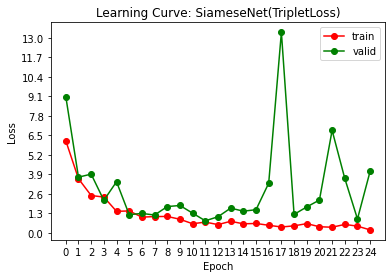

In [11]:
# Seed value to reproduce results
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.0001, 'reg': 0.05, 'epochs': 25, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 256,
              'model': 'SiameseNet', 'category': 'resnet18', 'pretrain': True,
              'data': 'dataset/flowers', 'img_h': 224, 'img_w': 224, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'TripletLoss', 'loss_margin': 1.0,
              'dataset': 'TripletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

In [ ]:
# Seed value to reproduce results
seed_value = 123456
set_seed(seed_value)

all_params = {'batch_size': 32, 'learning_rate': 0.00001, 'reg': 0.5, 'epochs': 40, 'momentum': .9,
              'validevery': 100, 'train_path': 'dataset/flowers/train',
              'test_path': 'dataset/flowers/test',
              'val_path': 'dataset/flowers/test', 'optimizer': 'adam', 'data_size': 256,
              'model': 'SiameseNet', 'category': 'convnext_tiny', 'pretrain': True,
              'data': 'dataset/flowers', 'img_h': 224, 'img_w': 224, 'faiss_db': 'siamesedb',
              'save_db': True, 'loss_type': 'TripletLoss', 'loss_margin': 1.0,
              'dataset': 'TripletData',
              'loglevel': 'info', 'logdir': 'logs', 'identity_start':0, 
              'identity_end': 0, 'identity_step':0, 'use_map': True}

log_file_name = setup_logging(all_params, seed_value)
run_experiment(all_params, log_file_name)

Setting seed value to 123456 for reproducing results
[INFO] RUNNING VALIDATION AT EPOCH 0
building database
Saving database to siamesedb
[INFO] MEAN AVERAGE PRECISIONS BY CATEGORY: [0.37945132666812353, 0.32527978206689145, 0.8188330116064492, 0.14714447336517653, 0.2872736692560911, 0.9559808680902431, 0.5628243284493284, 0.8926244816381537, 0.1932630141126235, 0.4834203665258353, 0.25080068043935233, 0.29991509141899764, 0.3338370613761239, 0.13619568907654847, 0.3093406485008048, 0.5517236886377511, 0.37005573094440286]
[INFO] CATEGORY MATCHES: 195/272: 0.7169
[INFO] Training Epoch 0


  0%|          | 0/34 [00:00<?, ?it/s]